In [34]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from jupyterthemes import jtplot
jtplot.style()
%matplotlib inline

In [2]:
# import dataset 
df = pd.read_csv('final_0921_edited.csv',usecols = ['lat','lng','Plan'])
df = df[df['lng']<-3]
df = df[df['Plan']!='Other']
df.head(3)

,Plan,lat,lng
0,In-person,32.469732,-99.708098
1,TBD,32.476850,-99.734056
2,Hybrid,32.430380,-99.749702


In [3]:
#eliminate dataset to those who actually in usa
df.describe()

,lat,lng
count,1884.000000,1884.000000
mean,38.345620,-90.605720
std,4.804453,15.460988
min,21.270955,-157.926212
25%,34.646636,-97.050577
50%,39.216016,-86.362174
75%,41.960246,-79.933793
max,48.883736,-67.242851


In [4]:
# split dataset into train and test 
x = df[['lat','lng']]
y = df['Plan']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

In [28]:
# build classifier
train_accuracy = []
test_accuracy = []
for k in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)

    train_accuracy.append(accuracy_score(y_train, knn.predict(x_train)))
    test_accuracy.append(accuracy_score(y_test, knn.predict(x_test)))

In [29]:
accuracy_summary = pd.DataFrame([train_accuracy, test_accuracy],
                                columns=range(1, 101),
                                index=['train', 'test'])
accuracy_summary = accuracy_summary.T
accuracy_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 1 to 100
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   train   100 non-null    float64
 1   test    100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


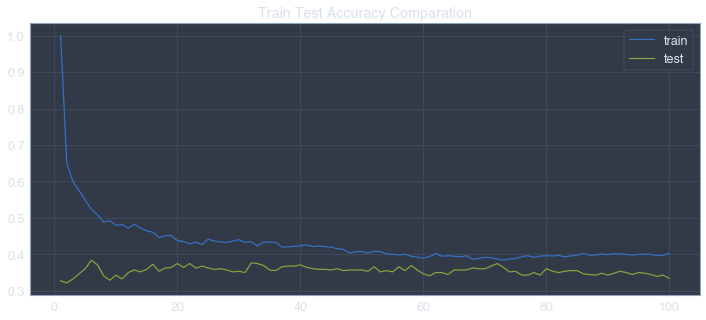

In [32]:
plt.figure(figsize = (12,5))
plt.plot(accuracy_summary['train'],label = 'train')
plt.plot(accuracy_summary['test'],label = 'test')
plt.title('Train Test Accuracy Comparation')
plt.legend()
plt.show()